## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Source:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

#### Read the iris.csv file

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# resample the dataset
from sklearn.utils import resample
from sklearn.utils import shuffle

# import various functions from sklearn 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier


# import the XGBoost function for classification
from xgboost import XGBClassifier

import random

In [3]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,2,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,3,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5,5.000000,3.600000,1.400000,0.200000,Iris-setosa


In [4]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [6]:
df['SepalLengthCm']=df['SepalLengthCm'].fillna(df['SepalLengthCm'].median())
df['SepalWidthCm']=df['SepalWidthCm'].fillna(df['SepalWidthCm'].median())
df['PetalLengthCm']=df['PetalLengthCm'].fillna(df['PetalLengthCm'].median())
df['PetalWidthCm']=df['PetalWidthCm'].fillna(df['PetalWidthCm'].median())

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [9]:
df['Species']=df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [10]:
df['Species'].unique()

array([0, 1, 2], dtype=int64)

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [42]:
df_feature = df.drop(columns='Species', axis=1)
X_scaler = StandardScaler()
num_scaled = X_scaler.fit_transform(df_feature)
X = pd.DataFrame(num_scaled, columns = df_feature.columns)
df_final=pd.concat([X,df['Species']],axis=1)
df_final

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-1.720693,-0.906750,1.040463,-1.353632,-1.325008,0
1,-1.697902,-1.150690,-0.124120,-1.353632,-1.325008,0
2,-1.675112,-1.394630,0.341713,-1.410833,-1.325008,0
3,-1.652321,-1.516600,0.108797,-1.296431,-1.325008,0
4,-1.629530,-1.028720,1.273380,-1.353632,-1.325008,0
5,-1.606740,-0.540840,1.972130,-1.182029,-1.060875,0
6,-1.583949,-1.516600,0.807546,-1.353632,-1.192941,0
7,-1.561159,-1.028720,0.807546,-1.296431,-1.325008,0
8,-1.538368,-1.760540,-0.357037,-1.353632,-1.325008,0
9,-1.515577,-1.150690,0.108797,-1.296431,-1.457074,0


In [67]:
df_final.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,0.942753
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.942753,0.775061,-0.417318,0.944477,0.952513,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [43]:
x = df_final.drop(columns=['PetalLengthCm','Species'])
y = df_final['Species']

## Question 6

*Plot the scatter matrix for all the variables.*

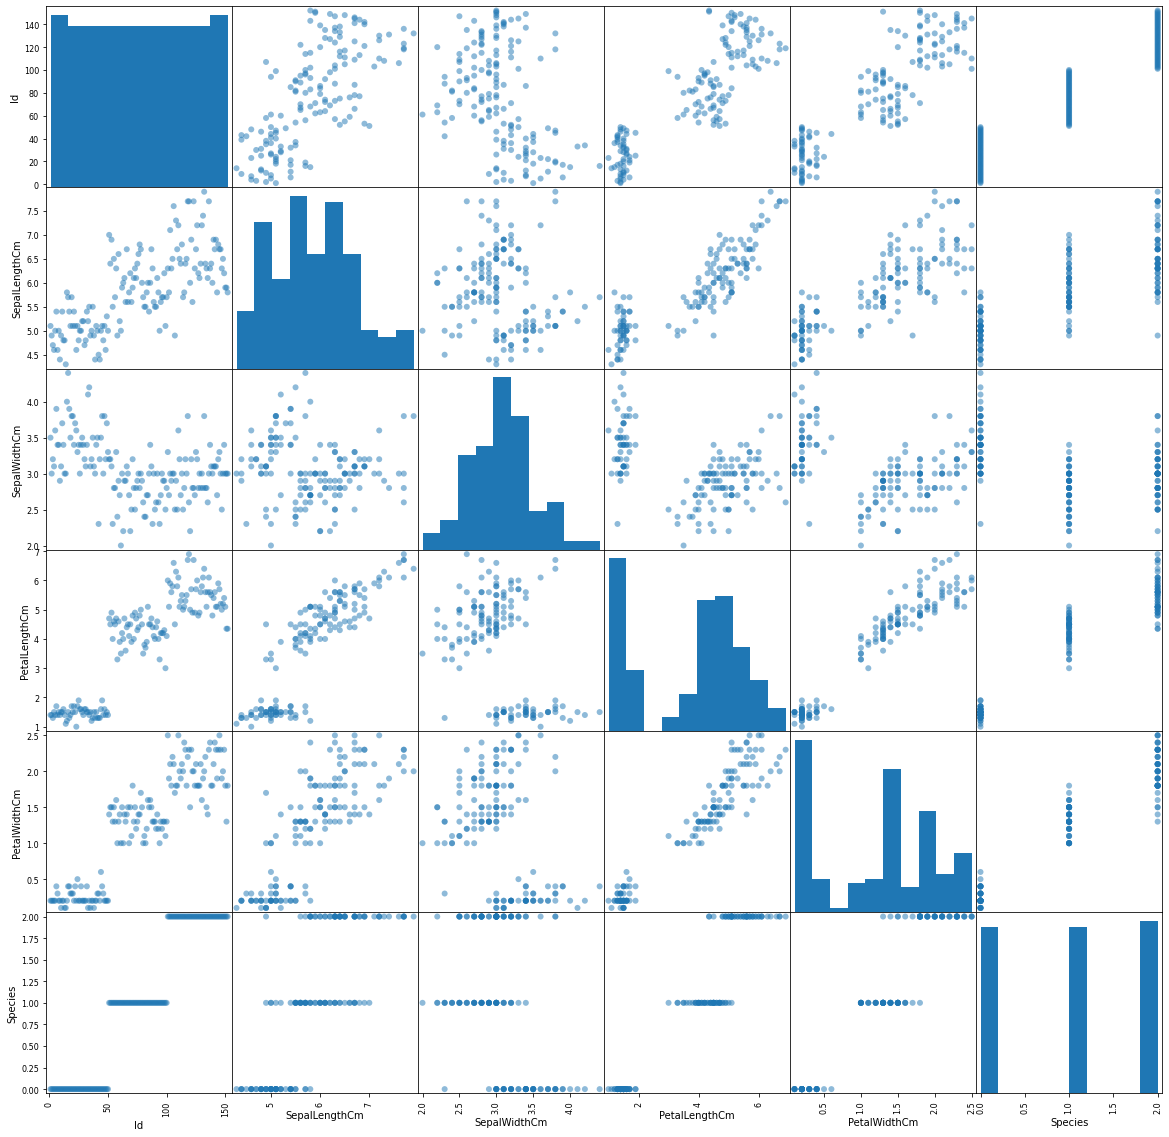

In [23]:
pd.plotting.scatter_matrix(df,figsize=(20,20),grid=True,marker='o')
plt.show()

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [48]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,train_size=0.8,random_state=10)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [49]:
xtrain.shape,ytrain.shape

((121, 4), (121,))

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn_classification = KNeighborsClassifier(n_neighbors = 1)
knn_model = knn_classification.fit(xtrain, ytrain)
y_pred = knn_model.predict(xtest)
print("Accuracy:",accuracy_score(ytest, y_pred))

Accuracy: 1.0


In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn_classification = KNeighborsClassifier(n_neighbors = 3)
knn_model = knn_classification.fit(xtrain, ytrain)
y_pred = knn_model.predict(xtest)
print("Accuracy:",accuracy_score(ytest, y_pred))

Accuracy: 1.0


In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn_classification = KNeighborsClassifier(n_neighbors = 5)
knn_model = knn_classification.fit(xtrain, ytrain)
y_pred = knn_model.predict(xtest)
print("Accuracy:",accuracy_score(ytest, y_pred))

Accuracy: 1.0


In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn_classification = KNeighborsClassifier(n_neighbors = 9)
knn_model = knn_classification.fit(xtrain, ytrain)
y_pred = knn_model.predict(xtest)
print("Accuracy:",accuracy_score(ytest, y_pred))

Accuracy: 1.0


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

# Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB

### Question 1
#### Import Iris.csv

In [54]:
df_n = pd.read_csv('iris.csv')
df_n.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,2,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,3,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5,5.000000,3.600000,1.400000,0.200000,Iris-setosa


### Question 2
#### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [78]:
X= df_n.drop(columns='Species')
y = df_n['Species']

## Question 3
#### Find the distribution of target variable (Class)
#### And, Plot the distribution of target variable using histogram

In [61]:
df['Species'].skew()

-0.024494428689462867

### Plot the distribution of target variable using histogram

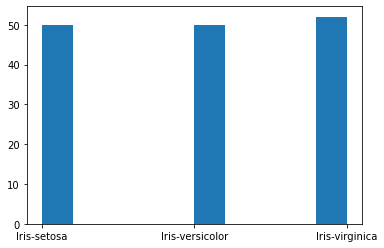

In [60]:
plt.hist(y)
plt.show()

### Plot Scatter Matrix to understand the distribution of variables and give insights from it.

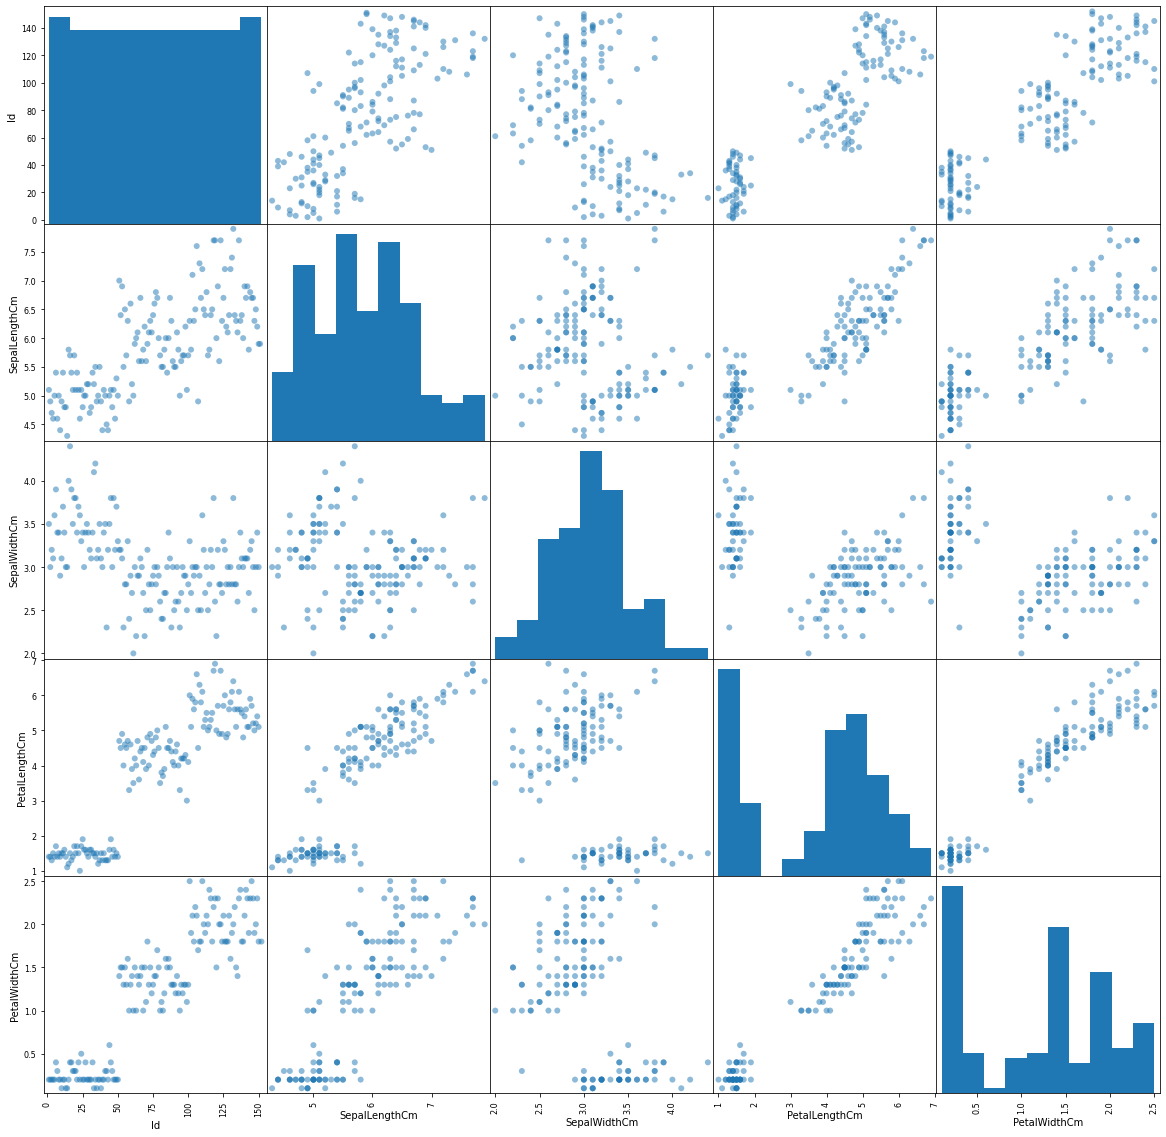

In [66]:
pd.plotting.scatter_matrix(df_n,figsize=(20,20),grid=True,marker='o')
plt.show()

### Question 3
#### Find Correlation among all variables and give your insights 

In [68]:
df_n.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.710342,-0.397729,0.882747,0.897900
SepalLengthCm,0.710342,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.897900,0.817954,-0.356544,0.962757,1.000000


In [69]:
# SepalLengthCm and PetalLengthCm -> Strong positive corr
# PetalWidthCm and SepalLengthCm -> Strong positive corr
# PetalLengthCm and PetalWidthCm -> Strong positive corr

### Question 4
#### Split data in Training and Validation in 80:20

In [75]:
### SPLITTING INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=22)

### Question 5
#### Do Feature Scaling 

### Question 6 
#### Train and Fit NaiveBayes Model

In [82]:
df_n.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [73]:
df_n['SepalLengthCm']=df_n['SepalLengthCm'].fillna(df_n['SepalLengthCm'].median())
df_n['SepalWidthCm']=df_n['SepalWidthCm'].fillna(df_n['SepalWidthCm'].median())
df_n['PetalLengthCm']=df_n['PetalLengthCm'].fillna(df_n['PetalLengthCm'].median())
df_n['PetalWidthCm']=df_n['PetalWidthCm'].fillna(df_n['PetalWidthCm'].median())

In [81]:
df_feature = df_n.drop(columns='Species', axis=1)
X_scaler = StandardScaler()
num_scaled = X_scaler.fit_transform(df_feature)
X = pd.DataFrame(num_scaled, columns = df_feature.columns)
df_final=pd.concat([X,df_n['Species']],axis=1)
df_final

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-1.720693,-0.906750,1.040463,-1.353632,-1.325008,Iris-setosa
1,-1.697902,-1.150690,-0.124120,-1.353632,-1.325008,Iris-setosa
2,-1.675112,-1.394630,0.341713,-1.410833,-1.325008,Iris-setosa
3,-1.652321,-1.516600,0.108797,-1.296431,-1.325008,Iris-setosa
4,-1.629530,-1.028720,1.273380,-1.353632,-1.325008,Iris-setosa
5,-1.606740,-0.540840,1.972130,-1.182029,-1.060875,Iris-setosa
6,-1.583949,-1.516600,0.807546,-1.353632,-1.192941,Iris-setosa
7,-1.561159,-1.028720,0.807546,-1.296431,-1.325008,Iris-setosa
8,-1.538368,-1.760540,-0.357037,-1.353632,-1.325008,Iris-setosa
9,-1.515577,-1.150690,0.108797,-1.296431,-1.457074,Iris-setosa


In [84]:
X= df_n.drop(columns='Species')
y = df_n['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=22)
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)

### Question 7
#### Print Accuracy and Confusion Matrix and Conclude your findings

In [85]:
y_pred = gnb_model.predict(X_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        31
      macro avg       1.00      1.00      1.00        31
   weighted avg       1.00      1.00      1.00        31



In [86]:
confusion_matrix(y_test, y_pred )

array([[10,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 10]], dtype=int64)

In [87]:
accuracy_score(y_test, y_pred)

1.0